# Machine Learning Project
## Flags

It is the goal of this project to attempt prediction to the continent of flags based on various features using decision trees.

The original dataset is avaiable at the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Flags

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
with open('flag.names') as names:
    print(names.read())

1. TItle: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America,

In [3]:
cols = ['name', 'landmass', 'zone', 'area', 'population', 'language', \
       'religon', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',\
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', \
       'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',\
       'triangle', 'icon', 'animate', 'text',' topleft', 'botright']

df = pd.read_csv('flag.data', names=cols)
df.head()

,name,landmass,zone,area,population,language,religon,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Select variables to use as predictors

In [4]:
var = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', \
       'mainhue', 'bars', 'stripes', 'circles', 'crosses', 'saltires',\
       'quarters', 'sunstars', 'triangle', 'animate']

To build a decision tree classifier to predict where does a particular flag come from, it is necessary to understand the distribution of flags by contient. Calculate the count of flags by contients. 

In [5]:
df['landmass'].map({1:'N.America', 2:'S.America', 3:'Europe', 4:'Africa', 5:'Asia', 6:'Oceania'}).value_counts()

Africa       52
Asia         39
Europe       35
N.America    31
Oceania      20
S.America    17
Name: landmass, dtype: int64

Let's focus on two continents for now, Europe and Oceania. Create a new dataframe with only flags from Europe and Oceania.

In [6]:
df_36 = df[df['landmass'].apply(lambda x: (x==3) or (x==6))]
df_36.head()

,name,landmass,zone,area,population,language,religon,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red


In [7]:
# Alternative way to extract rows with landmass value of 3 or 6
df_eo = df[df['landmass'].isin([3,6])]

Use the selected predictor variables to find the average values of each for Europe and Oceania.

In [8]:
df_36.groupby('landmass')[var].mean().T

landmass,3,6
red,0.828571,0.80
green,0.200000,0.20
blue,0.514286,0.80
gold,0.428571,0.60
white,0.771429,0.95
black,0.171429,0.15
orange,0.057143,0.15
bars,0.628571,0.00
stripes,1.285714,0.40
circles,0.028571,0.15


Inspect the variable types of the predictors and create labels for the two continents, Europe and Oceania.

In [9]:
df_36[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

In [10]:
labels = df_36['landmass']

The predictor `mainhue` is not numeric. Transform `mainhue` to numeric before building the Decision Tree Classifier.

In [11]:
data = pd.get_dummies(df_36[var])

Split the data into a train and test set.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, \
                                        random_state=1, test_size=0.4)

### Tune Decision Tree Classifiers by Depth

Explore how well does a decision tree model perform by tuning the model over a range of `max_depth` values and find the corresponding accuracy score.

In [13]:
depths = range(1,21)
acc_depth = []
for i in depths:
    dtree = DecisionTreeClassifier(random_state=10, max_depth = i)
    dtree.fit(x_train, y_train)
    acc_depth.append(dtree.score(x_test, y_test))

Plot the accuracy score of the model vs. `max_depth`.

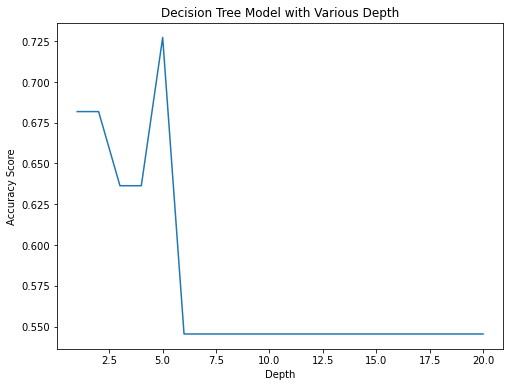

In [14]:
plt.figure(figsize=(8,6))
plt.plot(depths, acc_depth)
plt.xlabel('Depth')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Model with Various Depth')
plt.show()

Find the largest accuracy and the correponding depth. 

In [15]:
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print('The largest accuracy score is {max_acc}% which occurs at \
depth = {max_depth}.'.format(max_acc=round(max_acc*100,2), max_depth=best_depth))

The largest accuracy score is 72.73% which occurs at depth = 5.


Fit the Decision Tree Model using the depth of the largest accuracy.

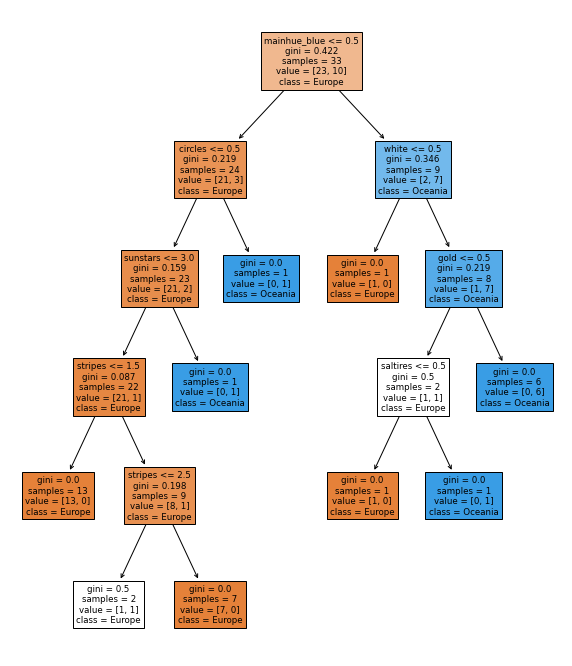

In [16]:
dtree = DecisionTreeClassifier(random_state=10, max_depth=best_depth)
dtree.fit(x_train, y_train)
plt.figure(figsize=(10,12))
tree.plot_tree(dtree, feature_names=x_train.columns, \
               class_names=['Europe', 'Oceania'], filled=True)
plt.show()

### Tune Decision Tree Classifiers by Pruning

Use the hyperparameter `ccp_alpha` to tune the Decision Tree Model.
Fit the deision tree classifier for each log value from -3 to 0 with 20 numbers.

In [17]:
ccp = np.logspace(-3,0,num=20)
acc_pruned = []
for i in ccp:
  dtree = DecisionTreeClassifier(random_state=10, max_depth=best_depth, ccp_alpha=i)
  dtree.fit(x_train, y_train)
  acc_pruned.append(dtree.score(x_test, y_test))

Plot the accuracy of the decision tree models vs. `ccp_alpha`.

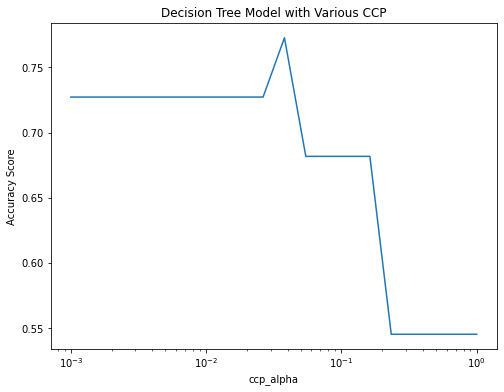

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Model with Various CCP')
plt.show()

Find the largest accuracy and the corresponding `ccp_alpha` value.

In [19]:
max_ccp_acc = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]
print('The highest accuracy score is {max_ccp_acc}% \
with best ccp value of {best_ccp}.'\
      .format(max_ccp_acc=round(max_ccp_acc*100, 2), \
              best_ccp=round(best_ccp, 4)))

The highest accuracy score is 77.27% with best ccp value of 0.0379.


Fit the decision tree classifier with the found best `max_depth` and `ccp_alpha` value and plot the final decision tree.
Notice that the final model increased its accuracy and the decison tree was simpler which would be much easier to interpret. 

<Figure size 432x288 with 0 Axes>

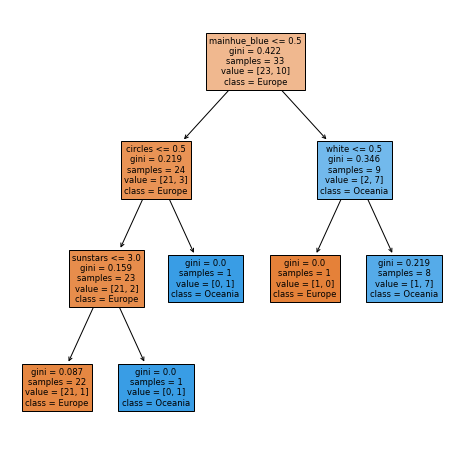

In [20]:
dtree = DecisionTreeClassifier(random_state=10, max_depth=best_depth,\
                               ccp_alpha=best_ccp)
dtree.fit(x_train, y_train)

plt.clf()
plt.figure(figsize=(8,8))
tree.plot_tree(dtree, feature_names=x_train.columns, \
               class_names=['Europe', 'Oceania'], filled=True)
plt.show()